In [2]:
'''
This file is the presentation for finite element solution of the Poisson equation

Author: Giuseppe Di Sciacca
'''

'\nThis file is the presentation for finite element solution of the Poisson equation\n\nAuthor: Giuseppe Di Sciacca\n'

In [3]:
import numpy as np
from meshing import Mesh, mesh_rectangle
from utils import ValidateAgainstAnalytical
from basis import Basis
from solvers import sparse_conjugate_gradients_solver as solve_system

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [4]:
# define domain
a = 0
b = 10
c = 0
d = 10

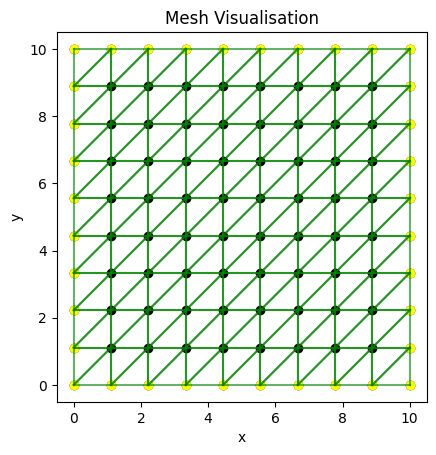

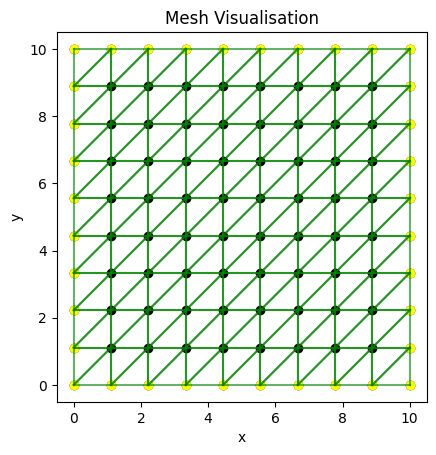

In [5]:
# test 1: meshing and visualisation
nx = 10
ny = 10
mesh = Mesh(*mesh_rectangle([a,b,c,d], nx, ny))
mesh.visualise2D()


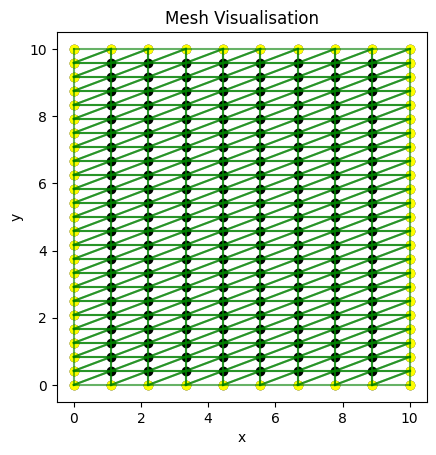

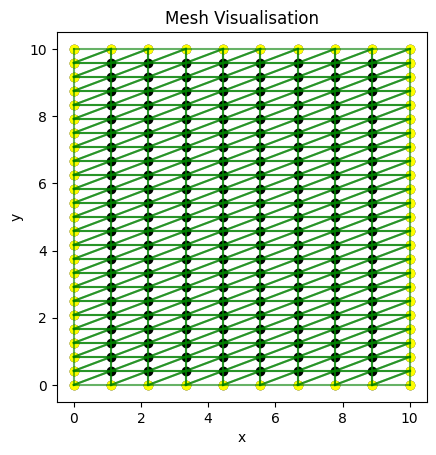

In [6]:
# test 2: meshing and visualisation
nx = 10
ny = 25
mesh = Mesh(*mesh_rectangle([a,b,c,d], nx, ny))
mesh.visualise2D()

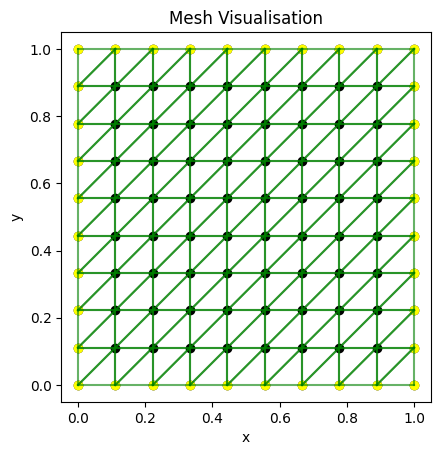

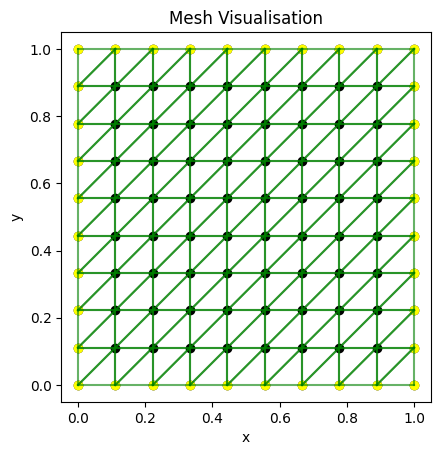

In [7]:
# test 2.A: meshing and visualisation
a = 0
b = 1
c = 0
d = 1
nx = 10
ny = 10
mesh = Mesh(*mesh_rectangle([a,b,c,d], nx, ny))
mesh.visualise2D()


C:\Users\giudi\Documents\Giuseppe\Projects\Glaux\Hand2Table\.venv\Lib\site-packages\scipy\sparse\_index.py:197: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


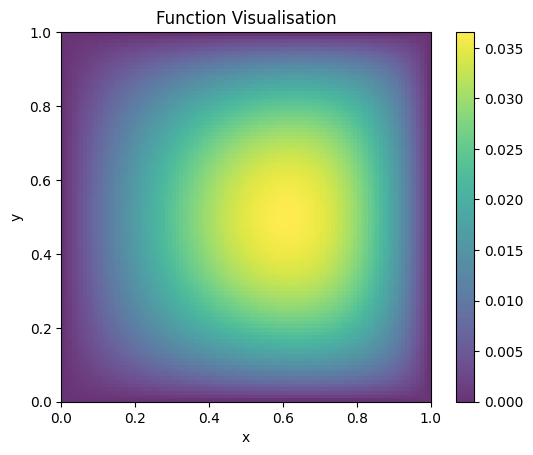

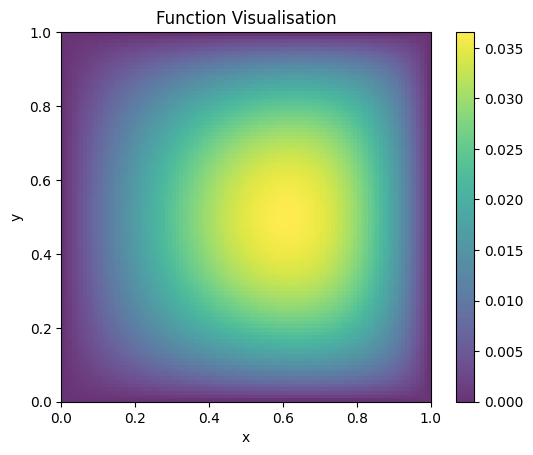

In [8]:
# test 3: build system and solve
nx = 100
ny = 100
mesh = Mesh(*mesh_rectangle([a, b, c, d], nx, ny))
basis = Basis('linear')
system = basis.basis_function.build_poisson_system(mesh, np.sin, 'dirichlet')
result = solve_system(*system)
mesh.visualise2D(result)


In [9]:
# test 4: change load
system = basis.basis_function.build_poisson_system(mesh, lambda x,y: np.sin(y)+np.cos(x)**2, 'dirichlet')
result = solve_system(*system)


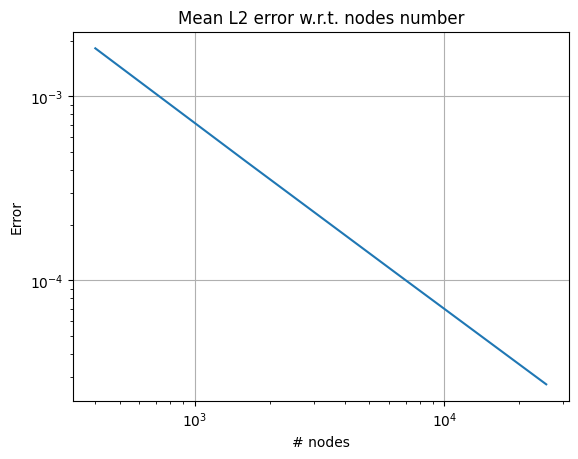

In [10]:
# test 5: compare against analytical solution
l2error = []
node_numbers = []
side_size = 10
for i in range(1,5):
    side_size = side_size*2
    mesh = Mesh(*mesh_rectangle([a, b, c, d], side_size, side_size))
    basis = Basis('linear')
    system = basis.basis_function.build_poisson_system(mesh, ValidateAgainstAnalytical().load_function_analytical, 'dirichlet')
    fem_result = solve_system(*system)
    analytical_result = ValidateAgainstAnalytical().analytical_solution_1x1_square(mesh.nodes[:,0].copy(),mesh.nodes[:,1].copy())
    l2error.append(  np.sqrt((1/mesh.numnd)*np.sum( (analytical_result - fem_result )**2 )))
    node_numbers.append(mesh.numnd)
plt.figure()
plt.loglog(node_numbers, l2error)
plt.title('Mean L2 error w.r.t. nodes number')
plt.ylabel('Error')
plt.xlabel('# nodes')
plt.grid(True)
plt.show(block=False)


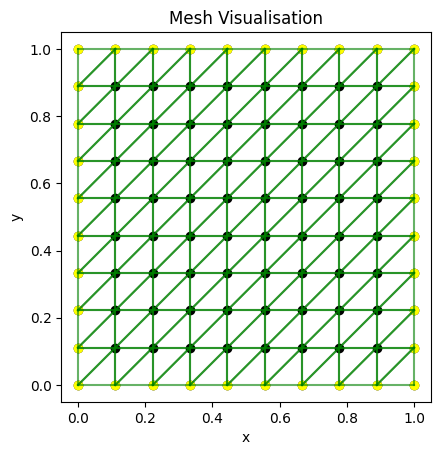

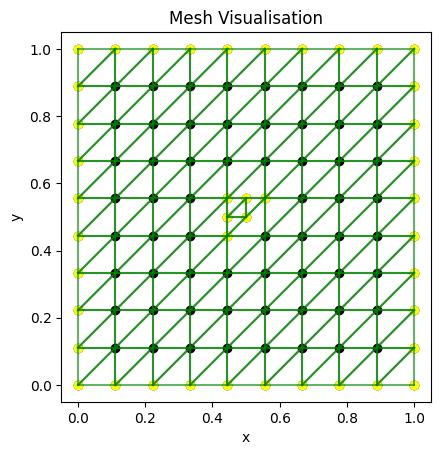

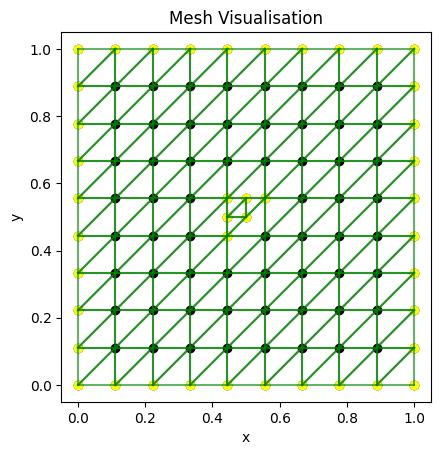

In [11]:
# test 6: split element
a = 0
b = 1
c = 0
d = 1
nx = 10
ny = 10
mesh = Mesh(*mesh_rectangle([a, b, c, d], nx, ny))
mesh.visualise2D()
refined_mesh = mesh.refine_mesh(mesh.elements[40,:])
refined_mesh.visualise2D()


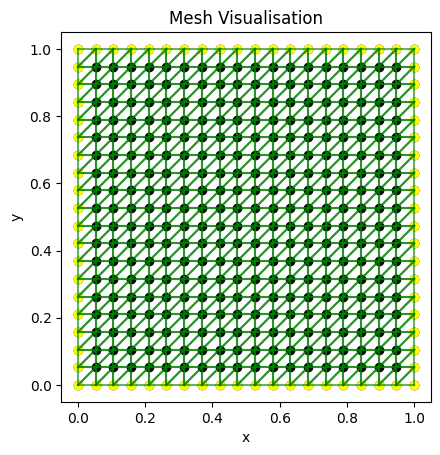

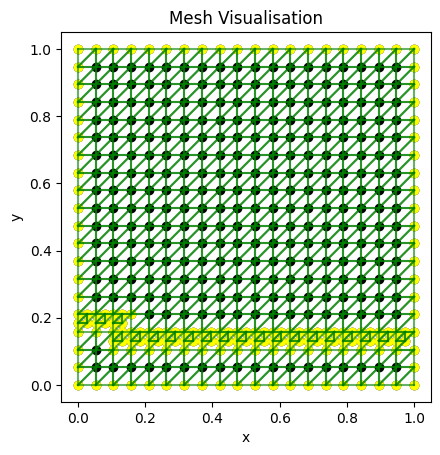

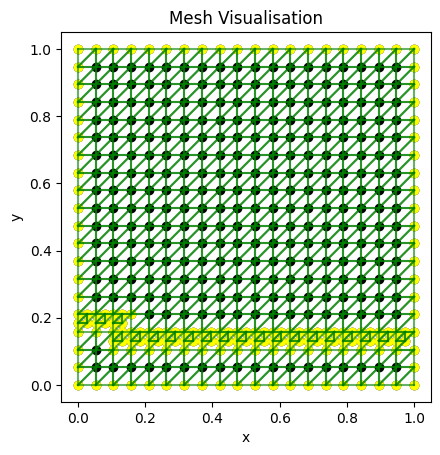

In [12]:
# test 7: split many elements (boundary elements identified in new elements)
a = 0
b = 1
c = 0
d = 1
nx = 20
ny = 20
mesh = Mesh(*mesh_rectangle([a, b, c, d], nx, ny))
refined_mesh = mesh.refine_mesh(mesh.elements[40:60, :])
mesh.visualise2D()
refined_mesh.visualise2D()


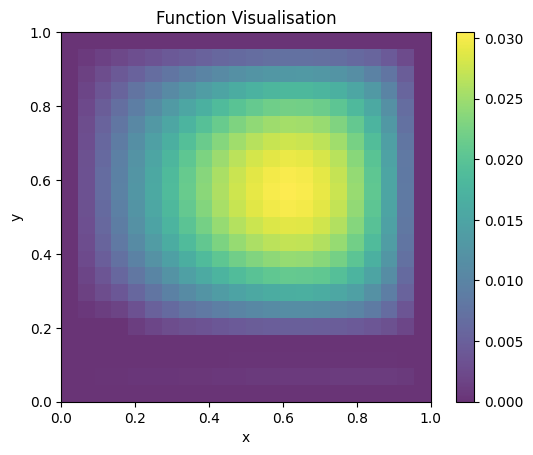

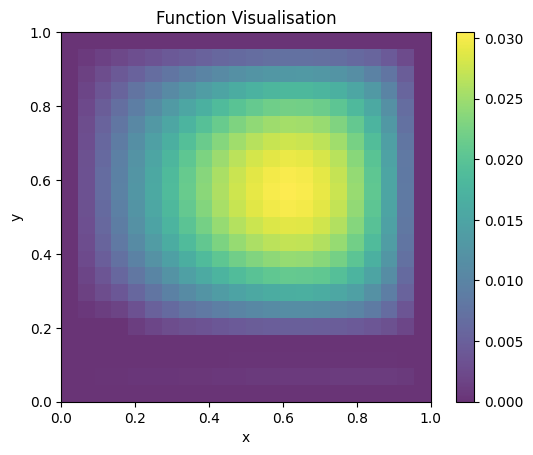

In [13]:
# test 8: check solution on refined mesh
basis = Basis( 'linear')
system = basis.basis_function.build_poisson_system(refined_mesh, np.sin, 'dirichlet')
result = solve_system(*system)
refined_mesh.visualise2D(result)


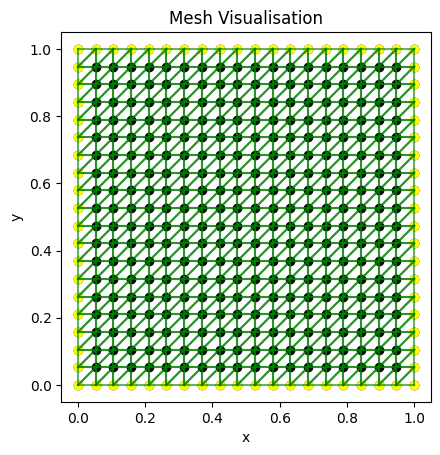

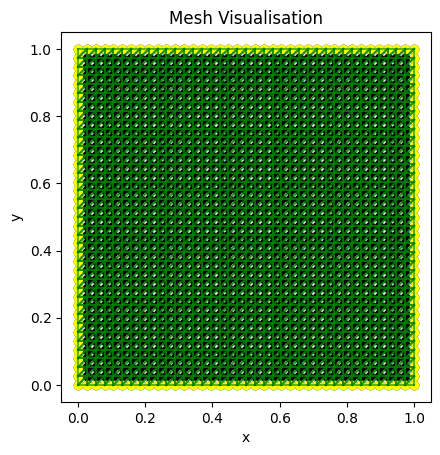

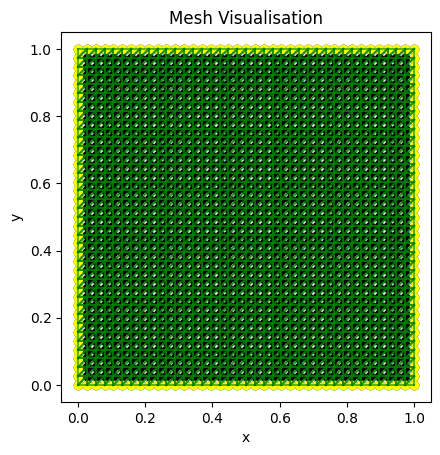

In [14]:
# test 9: split all elements (boundary should be where expected )
a = 0
b = 1
c = 0
d = 1
nx = 20
ny = 20
mesh = Mesh(*mesh_rectangle([a, b, c, d], nx, ny))
refined_mesh = mesh.refine_mesh(mesh.elements)
mesh.visualise2D()
refined_mesh.visualise2D()


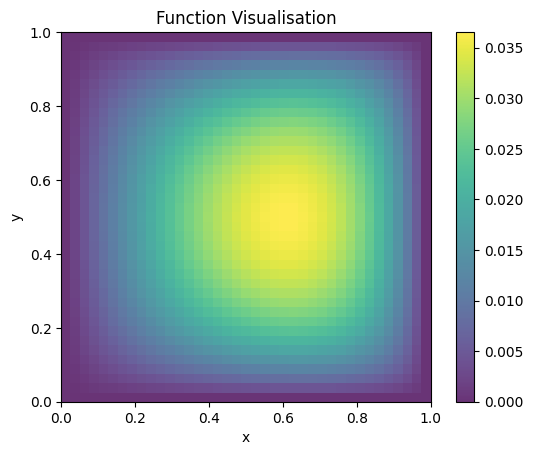

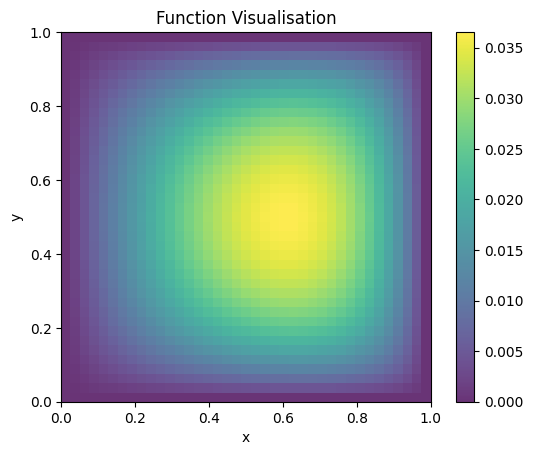

In [15]:
# test 10: check solution on refined mesh
basis = Basis('linear')
system = basis.basis_function.build_poisson_system(refined_mesh, np.sin, 'dirichlet')
result = solve_system(*system)
refined_mesh.visualise2D(result)


In [16]:
print('EoC')

EoC
